In [ ]:
import os
import pandas as pd

FILES = {
    "tick-note": "tick-note.csv",
    "add-plant": "add-plant.csv",
    "sign-up": "sign-up.csv",
    "kiwi-favourites": "kiwi-favourites.csv",
}

OUT_DIR = "ab_outputs_subjective"
PLOTS_DIR = os.path.join(OUT_DIR, "plots")
os.makedirs(PLOTS_DIR, exist_ok=True)

print("Saving plots to:", PLOTS_DIR)

Saving plots to: ab_outputs_subjective/plots


### This is a plot that explains the effect. Since boxplots serves a similar purpose we kept the boxplots.


In [2]:
import matplotlib.pyplot as plt

def paired_slope_plot(wide, title, ylabel="Rating"):
    """
    Paired slope plot for within-subject A/B data.
    Expects a DataFrame with columns ['A', 'B'].
    """
    A = wide["A"].to_numpy()
    B = wide["B"].to_numpy()

    plt.figure()
    for a, b in zip(A, B):
        plt.plot([0, 1], [a, b], marker="o", alpha=0.8)

    plt.xticks([0, 1], ["A", "B"])
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

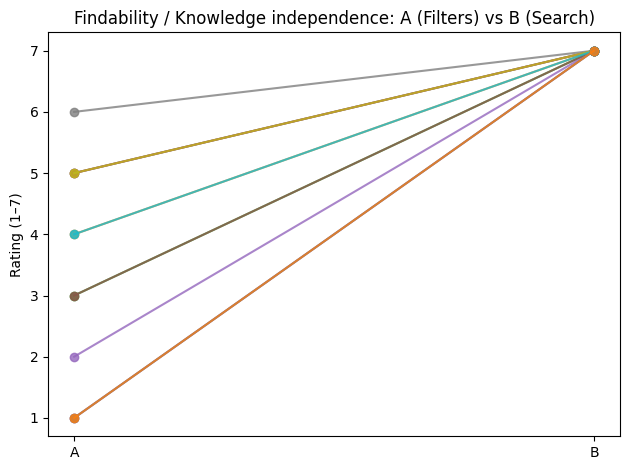

In [3]:
# load data
df = pd.read_csv("kiwi-favourites.csv")
df.columns = df.columns.str.strip()  # IMPORTANT: avoids KeyError

# build paired table
wide = df.pivot(index="participant_id", columns="condition", values="knowledge_independence")
wide = wide.dropna(subset=["A", "B"])

# plot
paired_slope_plot(
    wide,
    title="Findability / Knowledge independence: A (Filters) vs B (Search)",
    ylabel="Rating (1–7)"
)